# **Perceptron**

For this exercise, we will implement a simple Perceptron model from scratch using only NumPy for basic linear algebra operations. Below is the perceptron class, along with functions to visualize the decision boundary and accuracy over epochs.

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron Implementation
class Perceptron:
    def __init__(self, input_dim=2, learning_rate=0.01, max_epochs=100):
        self.w = np.zeros(input_dim)   # weights
        self.b = 0.0                   # bias
        self.lr = learning_rate
        self.max_epochs = max_epochs
        self.accuracy_history = []

    # Prediction function
    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, -1)

    # Training function
    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                if pred != target:
                    update = self.lr * target
                    self.w += update * xi
                    self.b += update
                    errors += 1
            acc = self.evaluate(X, y)
            self.accuracy_history.append(acc)
            if errors == 0:
                break
    
    # Evaluation function
    def evaluate(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Utility functions
def plot_data(X, y, title="Data Distribution"):
    plt.figure(figsize=(6,6))
    plt.scatter(X[y==1,0], X[y==1,1], color="red", label="Class 0", alpha=0.6)
    plt.scatter(X[y==-1,0], X[y==-1,1], color="blue", label="Class 1", alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# Decision boundary plotting
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    plt.figure(figsize=(6,6))
    plt.scatter(X[y==1,0], X[y==1,1], color="red", label="Class 0", alpha=0.6)
    plt.scatter(X[y==-1,0], X[y==-1,1], color="blue", label="Class 1", alpha=0.6)

    # Decision boundary
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx = np.linspace(x_min, x_max, 200)
    if model.w[1] != 0: 
        yy = -(model.w[0] * xx + model.b) / model.w[1]
        plt.plot(xx, yy, "k--", label="Decision boundary")

    # Highlight misclassified
    preds = model.predict(X)
    misclassified = X[preds != y]
    if len(misclassified) > 0:
        plt.scatter(misclassified[:,0], misclassified[:,1], 
                    facecolors='none', edgecolors='yellow', s=80, label="Misclassified")

    plt.legend()
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# Accuracy over epochs plotting
def plot_accuracy(history, title="Accuracy over Epochs"):
    plt.figure()
    plt.plot(range(1, len(history)+1), history, marker="o")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

## **Exercise 1**

### **Data Generation Task**

First we're going to generate two classes of 2D data points (1000 samples per class) using multivariate normal distributions with the parameters that were given:

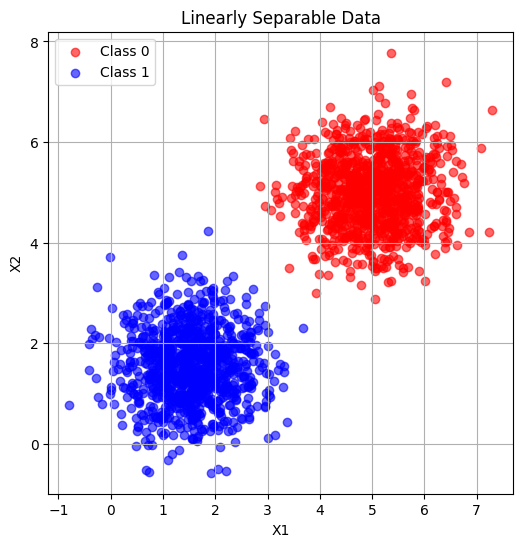

In [109]:
np.random.seed(42)

mean0, cov0 = [1.5, 1.5], [[0.5, 0], [0, 0.5]]
mean1, cov1 = [5, 5], [[0.5, 0], [0, 0.5]]

class0 = np.random.multivariate_normal(mean0, cov0, 1000)
class1 = np.random.multivariate_normal(mean1, cov1, 1000)

X1 = np.vstack((class0, class1))
y1 = np.hstack((-1*np.ones(1000), np.ones(1000)))

plot_data(X1, y1, "Linearly Separable Data")

### **Perceptron Implementation Task**

Now, we're going to implement a single-layer perceptron from scratch to classify the generated data into the two classes, using NumPy only for basic linear algebra operations.

Final weights: [0.01985622 0.01711828]
Final bias: -0.11999999999999998
Final accuracy: 1.0


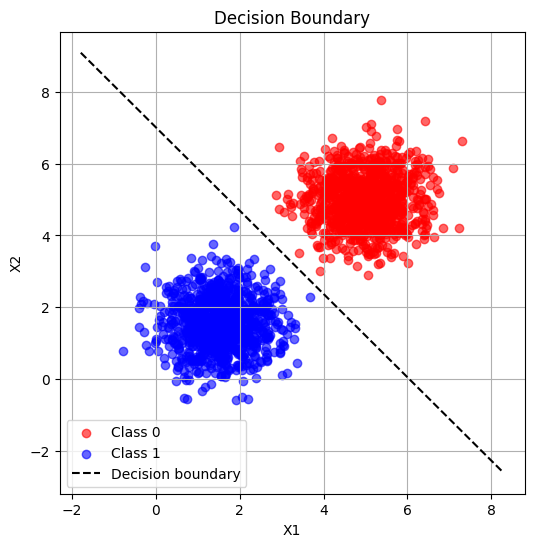

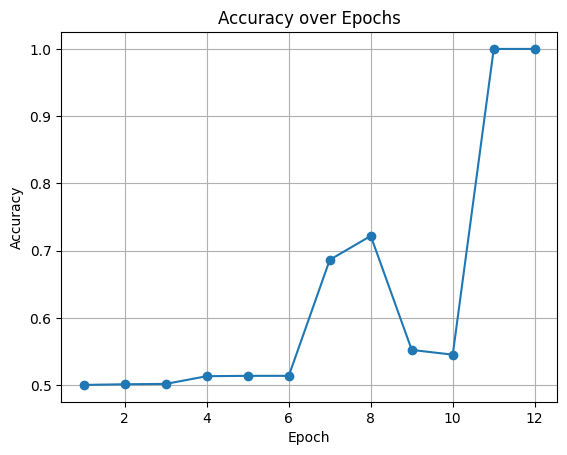

In [110]:
perc1 = Perceptron(input_dim=2, learning_rate=0.01, max_epochs=100)
perc1.fit(X1, y1)

print("Final weights:", perc1.w)
print("Final bias:", perc1.b)
print("Final accuracy:", perc1.evaluate(X1, y1))

plot_decision_boundary(perc1, X1, y1, "Decision Boundary")
plot_accuracy(perc1.accuracy_history, "Accuracy over Epochs")

The data's separability leads to quick convergence because the two clusters are centered far apart with little overlap, which means a straight line can perfectly separate them. In such a situation, the perceptron learning rule rapidly adjusts the weights after only a few misclassifications, since each update moves the decision boundary closer to an exact separator. Once all points fall on the correct side, no more updates are needed, and the algorithm converges in very few epochs. This clean separation also explains why the model achieves 100% accuracy rather than oscillating or plateauing below it.

## **Exercise 2**

### **Data Generation Task**

Now, we'll generate two new classes of 2D data points (1000 samples per class) using multivariate normal distributions with the parameters that were given, which will create partial overlap between the classes:

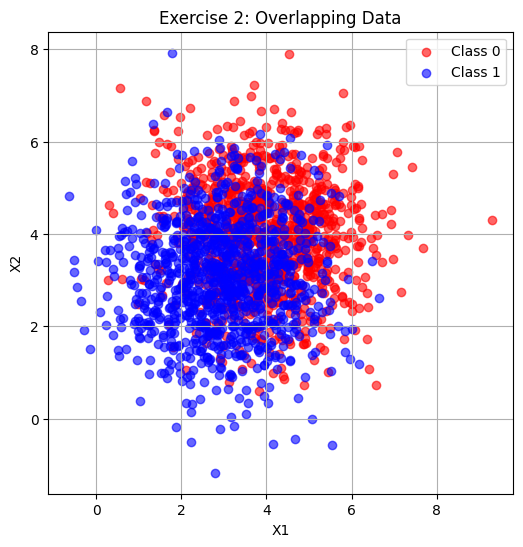

In [111]:
np.random.seed(24)

mean0, cov0 = [3, 3], [[1.5, 0], [0, 1.5]]
mean1, cov1 = [4, 4], [[1.5, 0], [0, 1.5]]

class0 = np.random.multivariate_normal(mean0, cov0, 1000)
class1 = np.random.multivariate_normal(mean1, cov1, 1000)

X2 = np.vstack((class0, class1))
y2 = np.hstack((-1*np.ones(1000), np.ones(1000)))

plot_data(X2, y2, "Exercise 2: Overlapping Data")

### **Perceptron Implementation Task**

Final weights: [0.06944049 0.09727756]
Final bias: -0.20000000000000004
Final accuracy: 0.508


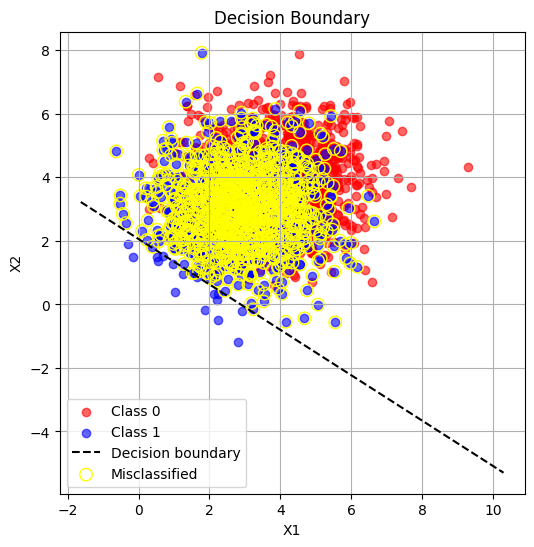

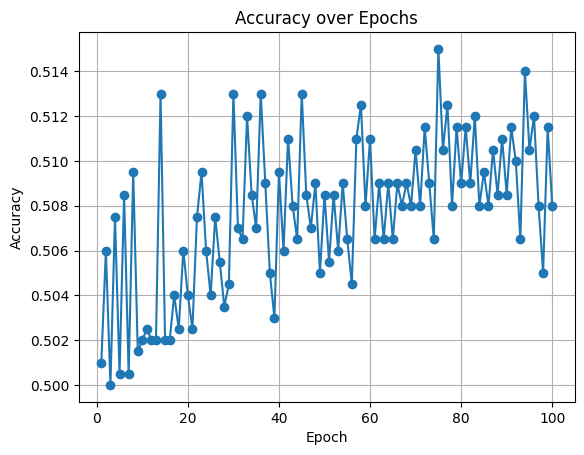

In [112]:
perc2 = Perceptron(input_dim=2, learning_rate=0.01, max_epochs=100)
perc2.fit(X2, y2)

print("Final weights:", perc2.w)
print("Final bias:", perc2.b)
print("Final accuracy:", perc2.evaluate(X2, y2))

plot_decision_boundary(perc2, X2, y2, "Decision Boundary")
plot_accuracy(perc2.accuracy_history, "Accuracy over Epochs")

With overlap, the perceptron cannot find a perfect linear separator.
Unlike in Exercise 1 (linearly separable data), convergence never occurs,
accuracy stays a little over 50%, and many points remain misclassified.
The algorithm keeps updating because correcting one side causes errors on the other.
This demonstrates the perceptron’s limitation: it only guarantees convergence when the data is linearly separable.